# Final Part I Written:

## Information about this Dataset 
* The name of this Dataset is Ramen Rating
* I obtained it from Kaggle.
* The URL for this dataset is https://www.kaggle.com/residentmario/ramen-ratings
* The license of this dataset is Data files © Original Authors.It is an open dataset from Kaggle.
* The file is 160 KB. and there are 2580 rows × 7 columns in this dataset.


## Characteristics of the Dataset
* The dataset is presenting the rating for ramens.
* The columns for this dataset are Review #,Brand,Varieties,Styles,Countries,Stars and top Ten.
* The data type for Brand,Variety,Style,Countries are nominal, for Stars are quantitative.

## Exploration of the Dataset
* I was first interested in visualizing the relationship between rate and different styles of ramen, as well as the average rating among different countries, or the kinds of raman each country has. But for some reason the Stars column are being recognized as string, not integer, so the aggregate mean or sum function do not work this time. 

* I then use the agg.count function to make visualization for the amount of ramen each style has as well as each country. The graphs are ploted below.

# Fianl Part II Written:

## Interactive Visualization
* For part two of our final project, I am going to make a linked interactive visualization. Although I tried to cleans the dataset by coding, it does not work, so I just hardcode the string value in the stars column.
* In the Dashbord type I created, you can change the style of the visualization. You can also select different fields, for example, country or brand, to see an aggregate present of the data. The plot on the left is the count of the review, you will see the number of reviews group by different fields. The plot on the right, is the mean of the stars, you will see the average rating group by different fields.
* By simpling selecting the field you would like to discover and the style you prefer, the linked plot would perform the aggregate count and mean for the ratings.
## Other Dataset
* In order to better tell a story about this instant food that many people like. 
*I also found a dataset about cereals https://www.kaggle.com/crawford/80-cereals.
*Maybe I can tell a story about how to prepare a fast meal in a busy day from the ramen and cereal dataset.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import bqplot
import traitlets
import ipywidgets
import matplotlib
%matplotlib inline

# Here I import anything I need for this dashboard

In [37]:
df = pd.read_csv('ramen-ratings1.csv',
                na_values = {'Stars': 0})
# As normal, I read the csv file as df using pandas

In [69]:
#for x in df['Stars']:
#    if x != float or x != int:
#        x = -1
# did not work

In [70]:
s = df['Stars']
pd.to_numeric(s)
# convert type to all numerical

0       3.75
1       1.00
2       2.25
3       2.75
4       3.75
        ... 
2572    3.50
2573    1.00
2574    2.00
2575    2.00
2576    0.50
Name: Stars, Length: 2577, dtype: float64

In [40]:
df.head(5)
# take a look to my dataset

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [9]:
#stats = df.groupby("Style")["Stars"].describe()

#@ipywidgets.interact(style = plt.style.available)
#def make_plot(style): # function!  its needs a colon!
#    with plt.style.context(style):
#        fig, ax = plt.subplots(1,1, figsize=(4,2))
#        ax.plot(stats["max"], marker='.', linewidth=1.0, label="Max")
#        ax.plot(stats["min"], marker='.', linewidth=1.0, label="Min")
#        ax.set_label('Style')
#        ax.set_ylabel("Stars")
#        ax.set_yscale("log")
#        ax.legend()
#    plt.show()

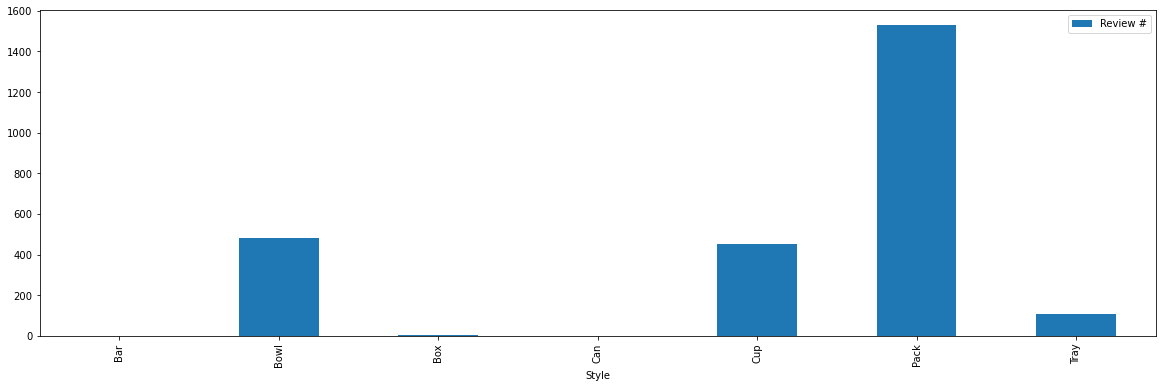

In [71]:
group = df.groupby('Style')
df1 = group.agg("count").reset_index()
df1.plot(x = "Style", y="Review #", figsize=(20,6), rot=90, kind='bar')
# From part 1

In [27]:
group = df.groupby('Country')
df2 = group.agg("count").reset_index()

In [57]:
@ipywidgets.interact(x = ["Brand", "Style", "Country", "Stars"],
                    style = plt.style.available)
def graph_builder(x,style):
    with plt.style.context(style):
        fig, ax = plt.subplots(1,1, figsize=(45,10))
        group = df.groupby(x)
        df1 = group.agg("count").reset_index()
        #df1.plot(x = x, y="Review #", figsize=(30,10), rot=90, kind='bar')
        plt.bar(df1[x],df1['Review #'])
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                     ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(15)
        plt.xticks(rotation=90)
    plt.show()

interactive(children=(Dropdown(description='x', options=('Brand', 'Style', 'Country', 'Stars'), value='Brand')…

In [60]:
@ipywidgets.interact(x = ["Brand", "Style", "Country", "Stars"],
                    style = plt.style.available)
def graph_builder(x,style):
    with plt.style.context(style):
        fig, ax = plt.subplots(1,1, figsize=(45,10))
        group = df.groupby(x)
        df1 = group.agg("mean").reset_index()
        #df1.plot(x = x, y="Review #", figsize=(30,10), rot=90, kind='bar')
        plt.bar(df1[x],df1['Stars'])
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                     ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(15)
        plt.xticks(rotation=90)
    plt.show()

interactive(children=(Dropdown(description='x', options=('Brand', 'Style', 'Country', 'Stars'), value='Brand')…

In [23]:
#button = ipywidgets.Button(description = "I am a Clicker")
#def say_click(event):
#    print("I have clicked. Click.")
#button.on_click(say_click)
#button

In [59]:
#df2.plot(x = "Country", y="Review #", figsize=(20,6), rot=90, kind='bar')

In [68]:
@ipywidgets.interact(x = ["Brand", "Style", "Country", "Stars"],
                    style = plt.style.available)
def graph_builder(x,style):
    with plt.style.context(style):
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(45, 10))
        #fig, ax = plt.subplots(1,1, figsize=(45,10))
        group = df.groupby(x)
        df1 = group.agg("count").reset_index()
        #df1.plot(x = x, y="Review #", figsize=(30,10), rot=90, kind='bar')
        axes[0].bar(df1[x],df1['Review #'])
        axes[0].set_title('numbers of Review', fontsize=12)
        df2 = group.agg("mean").reset_index()
        #df1.plot(x = x, y="Review #", figsize=(30,10), rot=90, kind='bar')
        axes[1].bar(df2[x],df2['Stars'])
        axes[1].set_title('mean of stars', fontsize=12)
        #for item in ([axes.title, axes.xaxis.label, axes.yaxis.label] +
         #            axes.get_xticklabels() + axes.get_yticklabels()):
         #   item.set_fontsize(15)
        #axes[0].xticks(rotation=90)
    plt.show()

interactive(children=(Dropdown(description='x', options=('Brand', 'Style', 'Country', 'Stars'), value='Brand')…